<a href="https://colab.research.google.com/github/MadhurAwasthi/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-UNSUPERVISED-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### **Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing csv file**

In [3]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### **Exploring Data**

In [4]:
# top 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Bottom 5 rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#no of rows and columns
print('NO of rows = '+ str(netflix_df.shape[0]))
print('NO of columns = '+ str(netflix_df.shape[1]))

NO of rows = 7787
NO of columns = 12


In [7]:
#To show No. of total values(elements) in the dataset
netflix_df.size

93444

In [8]:
#TO show the column names
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#To show the data type of each columns
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
#To show the datasets information like indexs,columns,data type etc.
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
#checking nan values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#TO check sum of null values
netflix_df.isna().sum().sum()

3631

In [13]:
#check the missing values percentage
missing_values_percentage = netflix_df.isna().mean()*100
print(missing_values_percentage)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


##This library is for showing the graph of missing value

In [14]:
#library
import missingno as msno

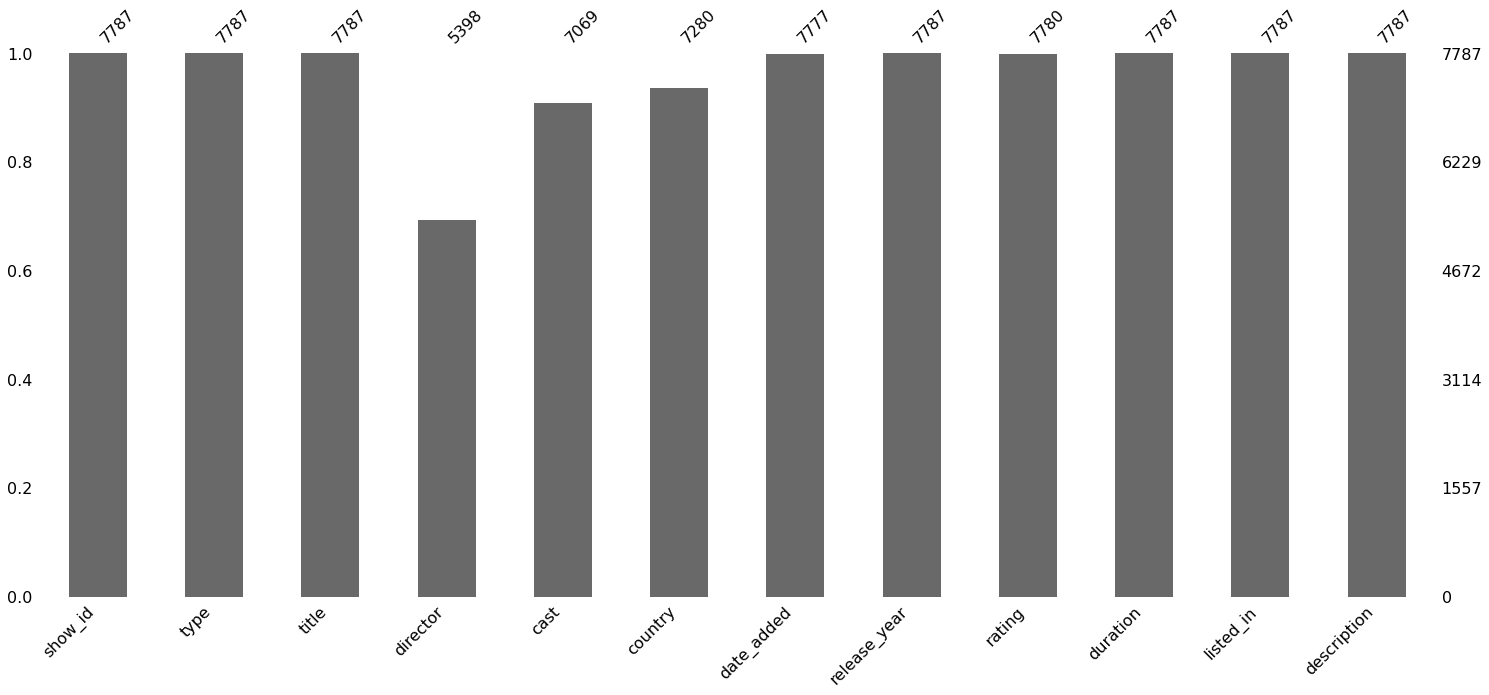

In [15]:
#this graph shows this which columns has missing values in white
msno.bar(netflix_df)

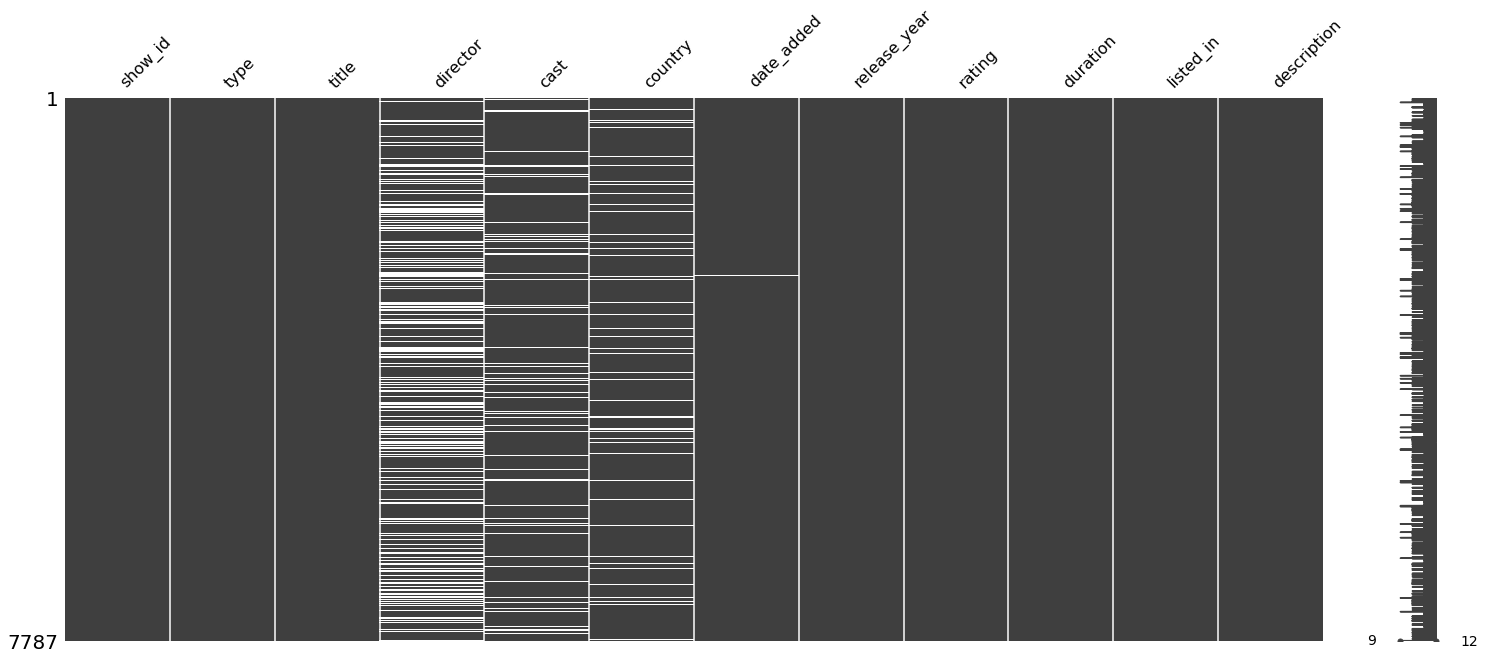

In [16]:
#this graph show the nan values in columns in white
msno.matrix(netflix_df)

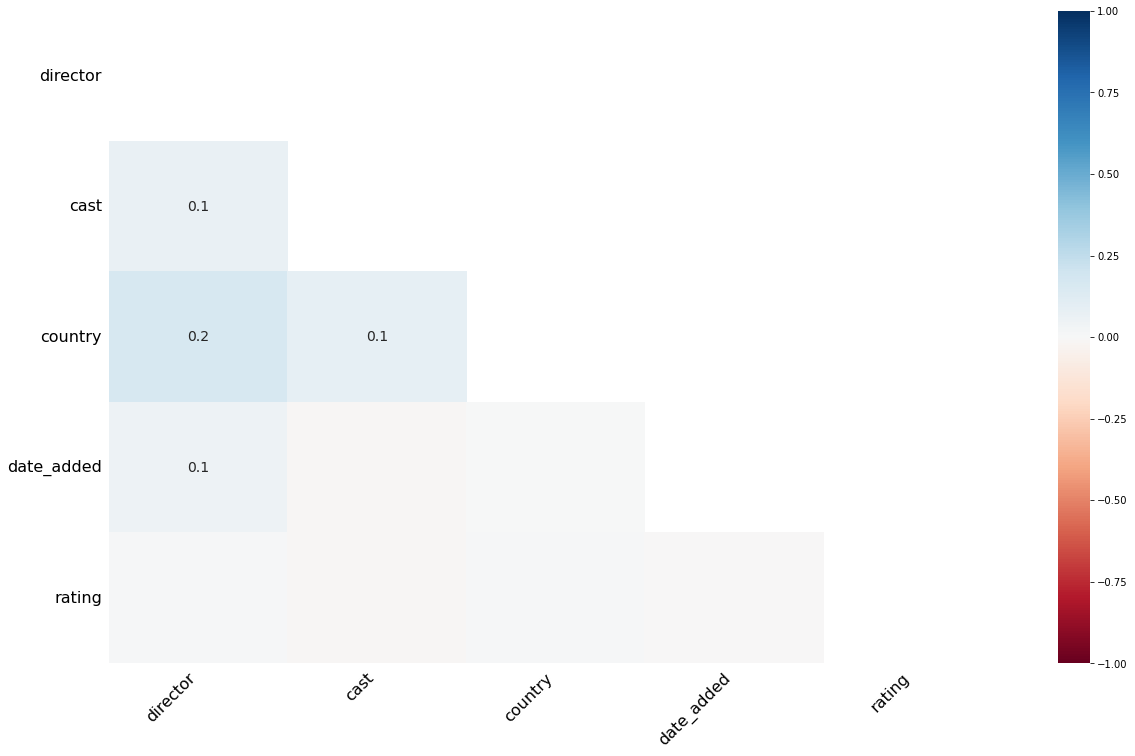

In [17]:
#This heatmap show the correlation between nan values columns
msno.heatmap(netflix_df)

In [18]:
#finding the duplicates in netflix_df
netflix_df.duplicated().sum()

0

As we can see above there is no duplicates in the dataset.


##Null values Treatment

In [19]:
#To seen nan values in date_added columns
netflix_df[netflix_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [20]:
#Remove nan values in date_added
netflix_df.dropna(subset=['date_added'],inplace=True)

In [21]:
#TO seen nan values in rating column
netflix_df[netflix_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [22]:
#Remove nan vlaues in rating 
netflix_df.dropna(subset=['rating'],inplace=True)

* As we can see date_added and rating columns have 10 & 7 missing values so we decided to drope this nan values 
* And director, cast and country columns have large number of missing values 2389,718 & 507. so we decided to replace this nan values with "Unavailable"


##**Handling Missing values**

In [23]:
#Remove nan values in director,cast and counrty
netflix_df.fillna('Unavaliable',inplace=True)

In [24]:
#After treatment of nan values check nan values
netflix_df.isna().sum().sum()

0

In [25]:
#describing data
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7770,7770,7770,7770,7770,7770,7770,7770.000000,7770,7770,7770,7770
unique,7770,2,7770,4048,6818,682,1563,NaN,14,216,491,7752
top,s1,Movie,3%,Unavaliable,Unavaliable,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5372,1,2376,718,2546,118,NaN,2861,1606,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935393,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.764357,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [26]:
#Looking for number of unique values in our dataset
netflix_df.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

In [27]:
#TO check the value counts of type column
netflix_df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [28]:
#Check the no of values counts in title column
netflix_df['title'].value_counts()

3%                                         1
Return of the Prodigal Son                 1
RIDE ON TIME                               1
Ride Like a Girl                           1
Ricky Gervais: Humanity                    1
                                          ..
Handsome Devil                             1
Hamza's Suitcase                           1
Hamid                                      1
Hamburger Hill                             1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
Name: title, Length: 7770, dtype: int64

In [29]:
netflix_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [30]:
#check unique values in listed_in column
netflix_df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [31]:
#check unique values in cast column
netflix_df['cast'].unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [32]:
#check value counts of director column
netflix_df['director'].value_counts().reset_index()

,index,director
0,Unavaliable,2376
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
...,...,...
4043,Charles Officer,1
4044,John Trengove,1
4045,Jonathan Helpert,1
4046,Jacob Schwab,1


## Make a copy of datasets due to visualization purpose

In [33]:
#creat a copy of datasets 
df = netflix_df.copy()

In [34]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
#check total sum of nan values
df.isna().sum().sum()

0

#**Exploratory Data Analysis:**

##**Type:Movie and TV Shows distribution**

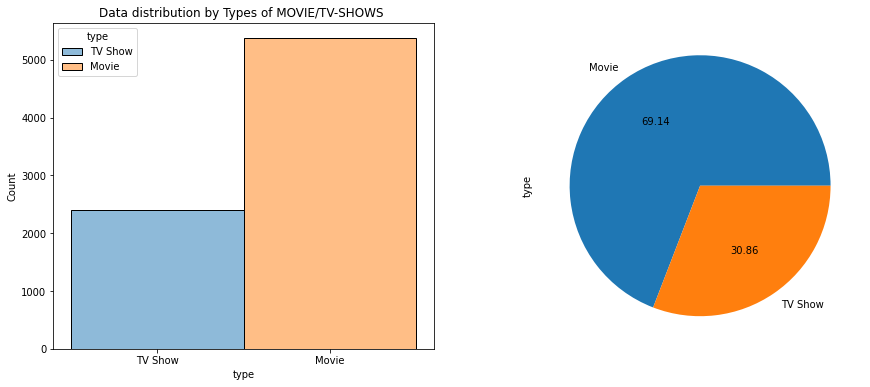

In [36]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
#This graph represtent the distribution of Types of shows in Netflix
sns.histplot(x="type",ax=axs[0],hue='type', data=df).set(title='Data distribution by Types of MOVIE/TV-SHOWS ')
#This graph represtent the Percentage of types of shows in netflix
df['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

* As we can see in the above graph we have more numbers of Movies than the TV shows which is 5372 Movies and 2398 TV Show. But this make sense TV shows are ongoing and have episodes.
*There are 69% Movies and 31% TV shows on Netflix 


In [37]:
#check value counts in rating
netflix_df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

##**Type and Rating:**

##Ratings : Netflix rating is based on MPAA (Motion Picture Association of America) Ratings System and The TV Parental Guidelines ratings provides program ratings, and content ratings to provide a clearer idea of the reason for a program’s rating.

* **G** – General Audience(all ages admitted).
* **PG** – Parental Guidance Suggested ( some material may not be suitable for children).
*  **PG-13** – Parents Strongly Cautioned (some material may be inappropriated for children under 13).
* **R** – Restricted (Under 17 requires Accompanying parent or adult guardians).
* **NC-17** – No Children 17 or Under (no one 17 or under admitted),
* **TV-Y** – This program is designed to be appropriate for all children.
* **TV-Y7** – This program is designed for children age 7 and above.
* **TV-G** – General Audience
* **NR**  - NOt rated
* **TV-PG** – Parental Guidance Suggested or This program contains material that parents may find unsuitable for younger children.
* **TV-14** – Parents Strongly Cautioned or This program contains some material that many parents would find unsuitable for children under 14 years of age.
* **TV-MA** – TV Mature Audience Only or This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
* **TV-Y7-FV** - Fantasy violence (exclusive to the TV-Y7 rating)
* **UR** -  unrated.





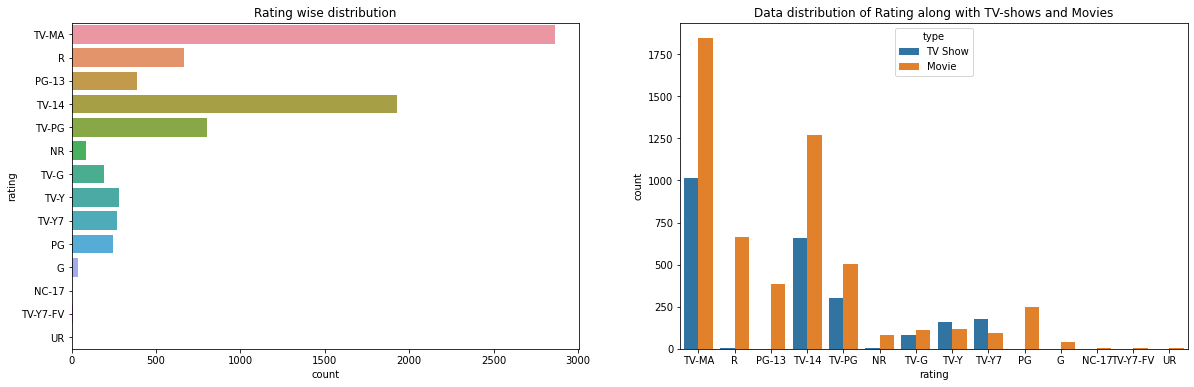

In [38]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent Relationship between Type and Rating  
sns.countplot(y="rating",ax=axs[0], data=df).set(title='Rating wise distribution')
#This graph represents the distribution of Rating as well as the number of TV-show and Movies
sns.countplot(x="rating", hue="type",ax=axs[1], data=df).set(title='Data distribution of Rating along with TV-shows and Movies')

plt.show()

* We could see that the TV-MA (TV Mature Audience Only or This program is specifically designed to be viewed by adults) rating has much more content in both Movies and TV shows.
* And then for TV-14 (Parents Strongly Cautioned or unsuitable for children under 14 years) is second highest in number.


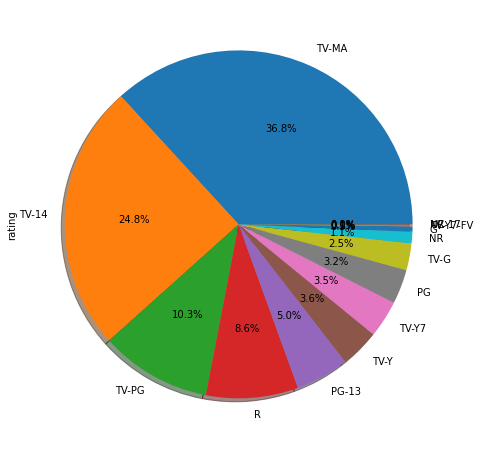

In [39]:
#To show the rating percentage 
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))

plt.show()

As we can see in the above grapg more then 60% of movie and tv show come in the rating TV-MA and TV-14 

##**Some Feature Engineering required For Data Visualization**

In [40]:
# Creating new features to store date, day, month and year seperately.
df['date'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_day'] = df['date'].dt.day.astype(int)
df['date_month'] = df['date'].dt.month.astype(int)
df['date_year'] = df['date'].dt.year.astype(int)

Converting date_added to datetime formate and creating new features to store date, day, month and year

In [41]:
#Check unique value in release_year column
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [42]:
#check total number of tv shows and movies year wise 
df['release_year'].value_counts().reset_index().head()

,index,release_year
0,2018,1120
1,2017,1010
2,2019,996
3,2016,881
4,2020,868


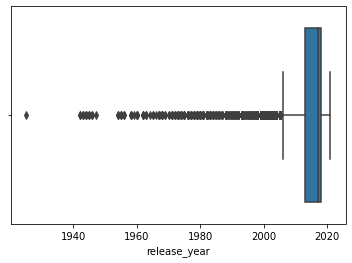

In [43]:
sns.boxplot(netflix_df.release_year)

As we can see from above boxplot, before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values as outliers.

##**Release_year:**

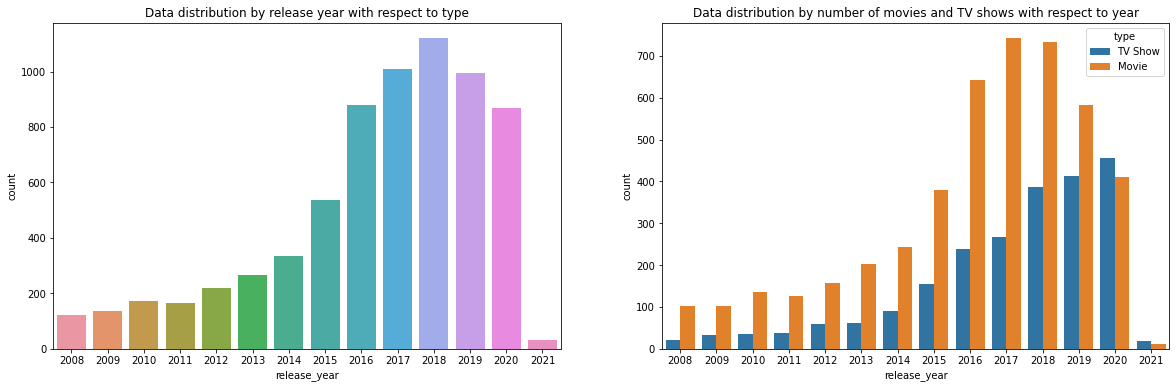

In [44]:

df1 = df[(df['release_year']>=2008)]
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent the number of movies anb tv shows released in after 2008
sns.countplot(x="release_year",ax=axs[0], data=df1).set(title='Data distribution by release year with respect to type')
# This graph represent the distribution of movies and tv shows released in after 2008  
sns.countplot(x="release_year",hue='type',ax=axs[1], data=df1).set(title='Data distribution by number of movies and TV shows with respect to year')
plt.show()
#ax = sns.countplot(x="release_year", hue="type", data=df1).set(title='Data distribution of release_year wise type of tv show and movies')

* We can see that the Highest number of Movies and TV show were released in the year 2017 to 2019.
* And also seen that the number of movies on Netflix is higher than tv shows.
* we can see that number of TV shows are increasing year by year.
* We can see growth of TV shows is ore in recent years.   



##**Top 10 countries producing content:**




In [45]:
#check value counts of country
df['country'].value_counts().reset_index().head(10)

,index,country
0,United States,2546
1,India,923
2,Unavaliable,505
3,United Kingdom,396
4,Japan,224
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


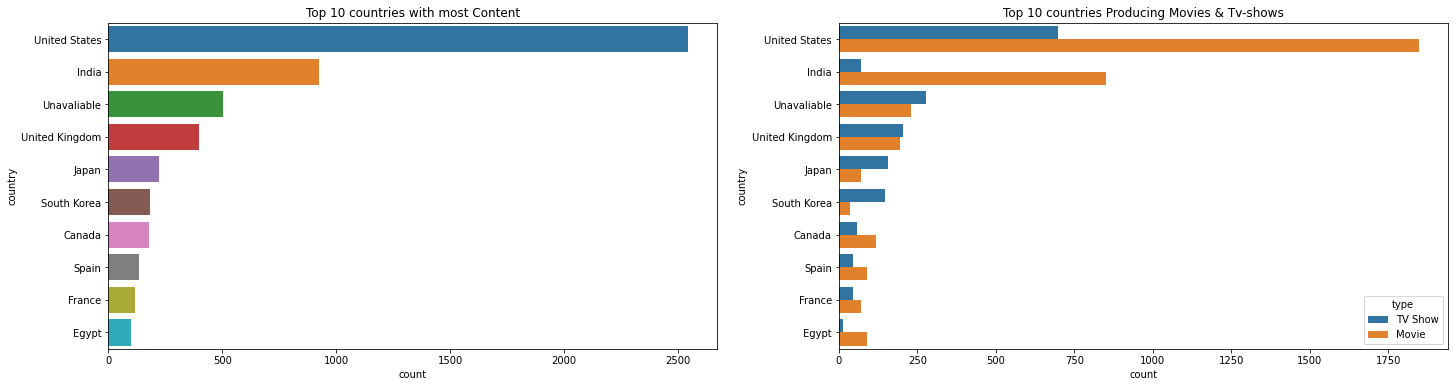

In [46]:
#Figuring some graph
fig,axs=plt.subplots(1,2,figsize=(24,6))
#Analysing top 10 countries with most content 
sns.countplot(data=df,y='country',ax=axs[0],order=df['country'].value_counts().index[0:10]).set(title='Top 10 countries with most Content')
#This graph represent the Top 10 countries contents with Movies and tv-shows
sns.countplot(data=df,y='country',ax=axs[1],order=df['country'].value_counts().index[0:10],hue='type').set(title='Top 10 countries Producing Movies & Tv-shows')
plt.show()

* Top content Producing courtries are US and India
* As we can see in the above graph that most of the content being produced in the United States , India and United Kingdom ,which account for more than 50% of the content created.

##**Top 10 Directors:**

In [47]:
#top 10 director
df['director'].value_counts().reset_index().head(11)[1:11]

,index,director
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Robert Rodriguez,8


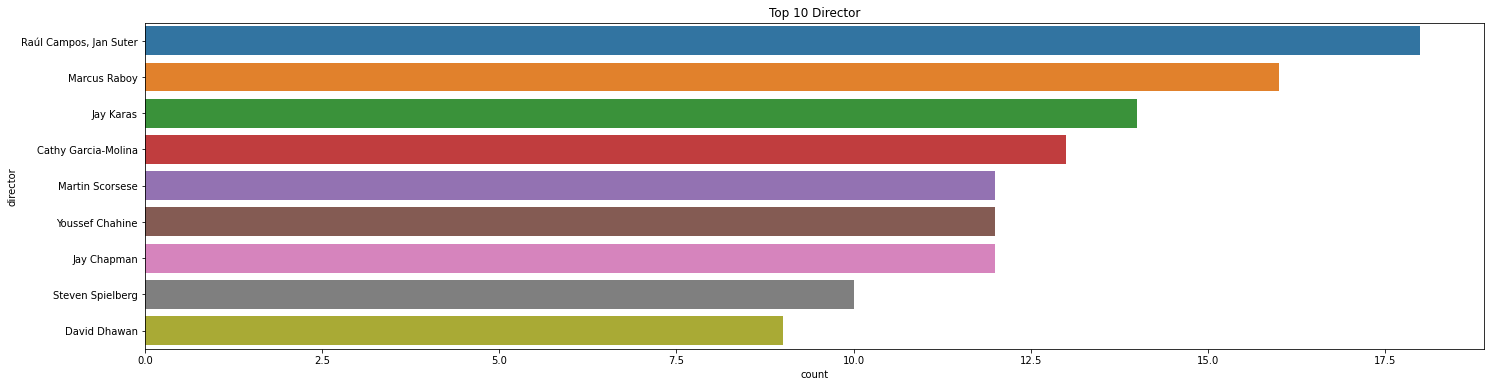

In [48]:
#Figuring some graph
plt.figure(figsize=(24,6))
#Analysing top 10 Director
sns.countplot(y='director',data=df,order=df['director'].value_counts().index[1:10]).set(title='Top 10 Director')
plt.show()

The most popular director on Netflix is Jan Suter & Raul Campos.

In [49]:
#top actor 
df['cast'].value_counts().reset_index().head(11)[1:11]

,index,cast
1,David Attenborough,18
2,Samuel West,10
3,Jeff Dunham,7
4,Craig Sechler,6
5,Kevin Hart,6
6,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",6
7,Iliza Shlesinger,5
8,Bill Burr,5
9,Jim Gaffigan,5
10,Jerry Seinfeld,4


##**Month wise distribution of Type:**

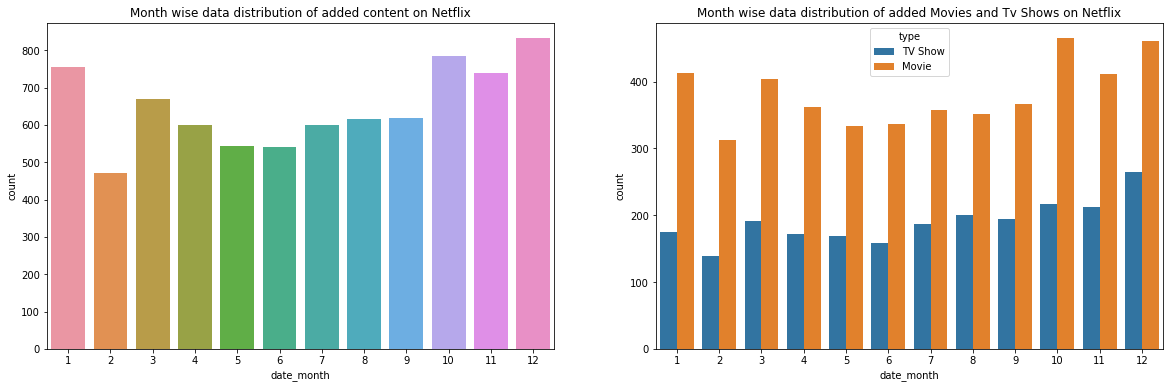

In [50]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent the number Content added on netflix month wise
sns.countplot(x="date_month",ax=axs[0], data=df).set(title='Month wise data distribution of added content on Netflix')
# This graph represent the Monthly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_month",hue='type',ax=axs[1], data=df1).set(title='Month wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()


We can clearly see that most of the content has been added to Netflix during the holiday season—October, November, December, and January.



##**Date wise content added in netflix:**

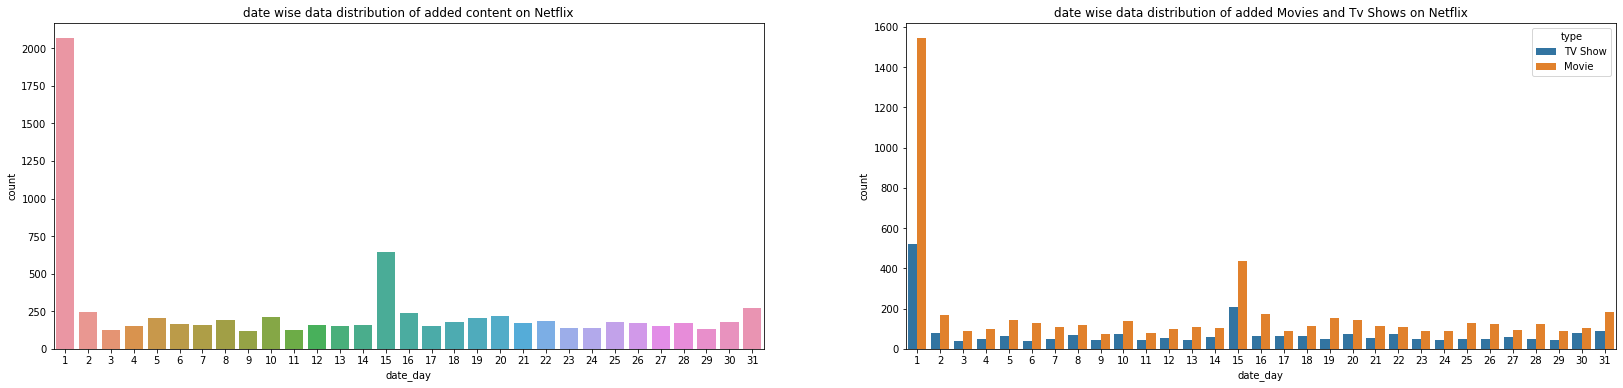

In [51]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(28,6))
# This graph represent the year wise number of Content added on netflix 
sns.countplot(x="date_day",ax=axs[0], data=df).set(title='date wise data distribution of added content on Netflix')
# This graph represent the yearly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_day",hue='type',ax=axs[1], data=df).set(title='date wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

* we can clearly spot the insights that Netflix majorly add the content on the 1st day of every month. And there is another day which is 15th, mid of the month which has second highest number of contents added on it.

##**Year wise content added in Netflix:**

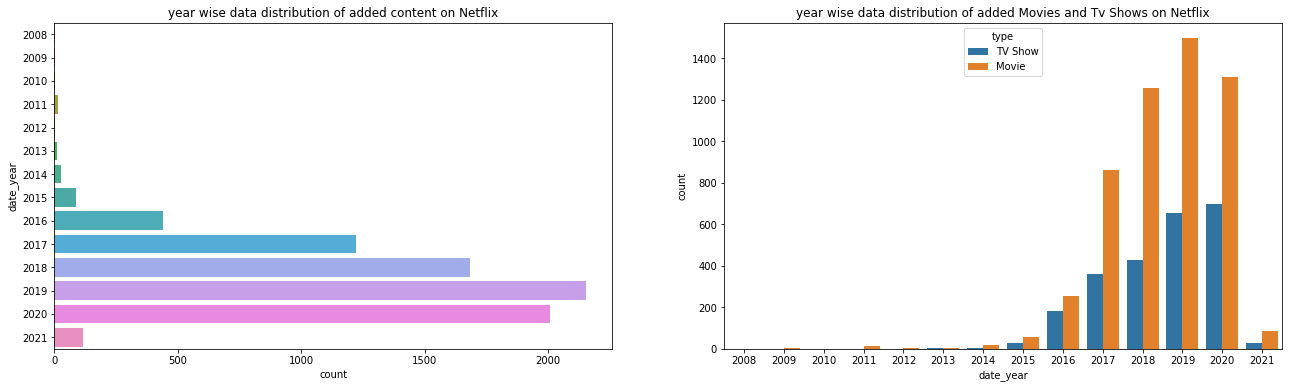

In [52]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(22,6))
# This graph represent the year wise number of Content added on netflix 
sns.countplot(y="date_year",ax=axs[0], data=df).set(title='year wise data distribution of added content on Netflix')
# This graph represent the yearly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_year",hue='type',ax=axs[1], data=df).set(title='year wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

##**Country vs Rating**

In [53]:
#creat a dataframe of top 10 country wtf of content
df_1 = df['country'].value_counts().reset_index()[:10].rename(columns={'index':'country','country':'count'})
df_1

,country,count
0,United States,2546
1,India,923
2,Unavaliable,505
3,United Kingdom,396
4,Japan,224
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


In [54]:
#creat a list of top 10 country
list_top_10_countries = df_1['country'].tolist()
list_top_10_countries

['United States',
 'India',
 'Unavaliable',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Egypt']

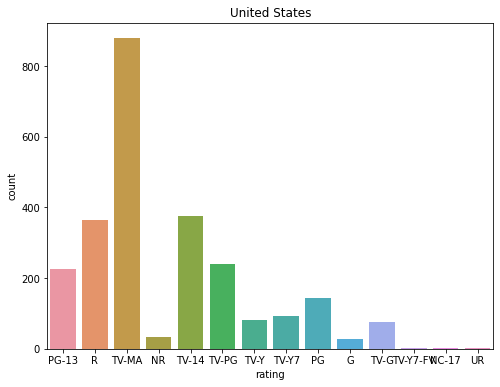

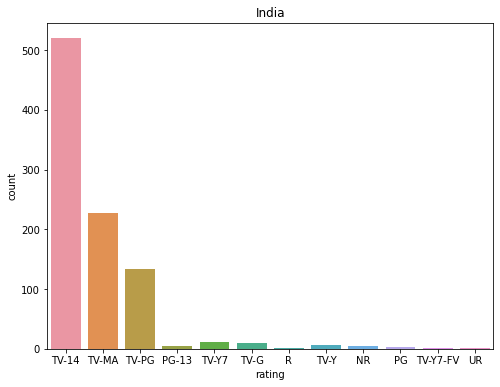

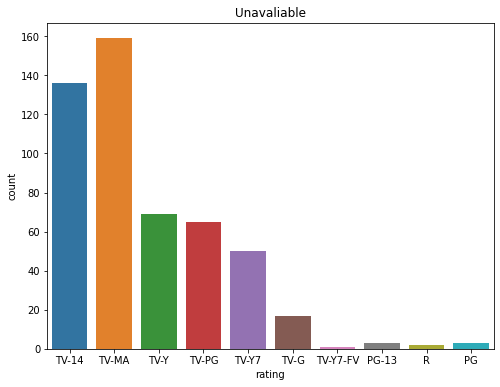

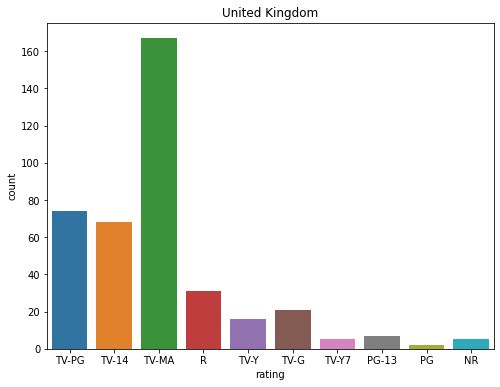

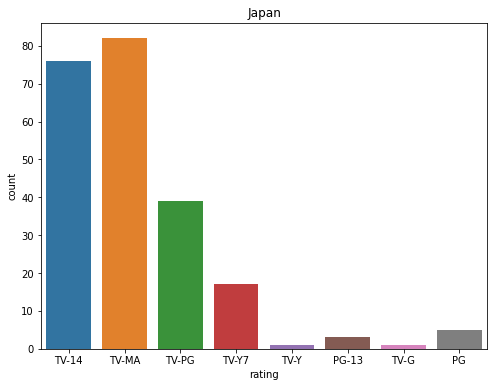

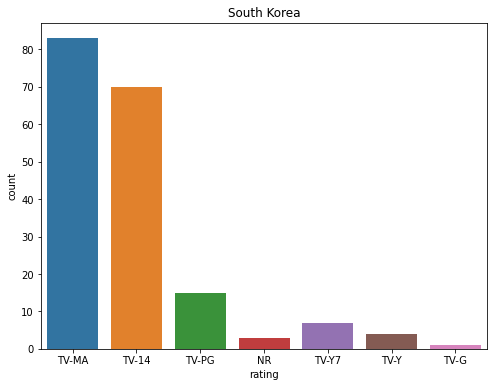

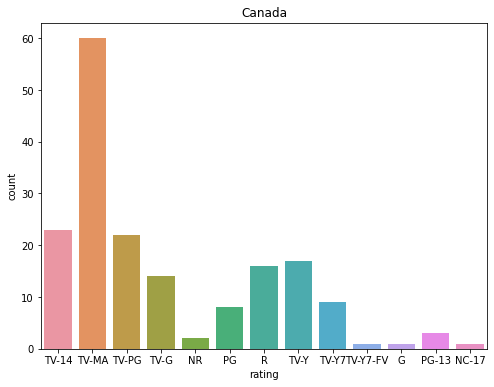

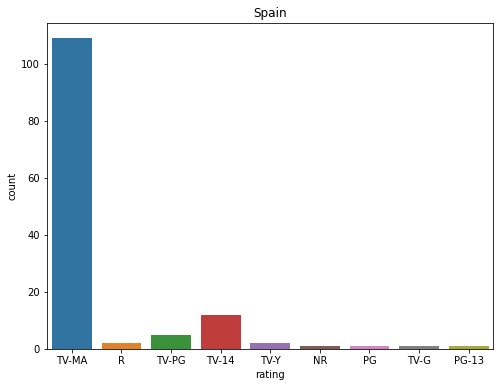

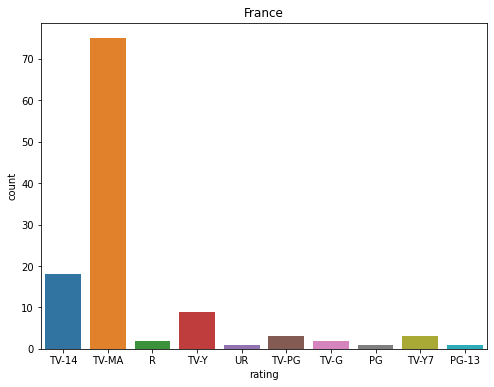

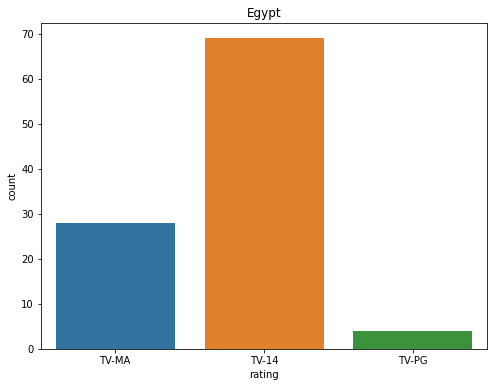

In [55]:

for country in list_top_10_countries:
  plt.figure(figsize=(8,6))
  ax = sns.countplot(x='rating',data=df[df['country']==country])
  ax.set_title(country)

* The shows with TV-MA rating are highest in countries like : United State, France, Spain, Canada, south korea, Japan, United Kingdom

* And the shows with TV-14 rating are highest in India, japan, South Korea, and Egypt


#**WordCloud**

In [56]:
from wordcloud import WordCloud, STOPWORDS



##**Word Cloud of Countries**

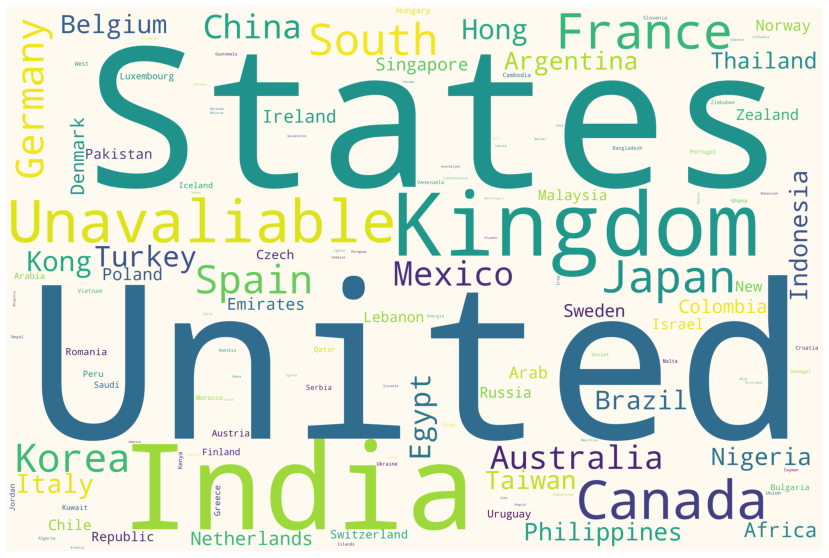

In [57]:
#Creating the text variable
text = " ".join(country for country in df.country)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,10))
word_cloud = WordCloud(width=3000,height=2000,collocations = False, background_color = 'floralwhite').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In above word cloud we can see various keywords from different countries and we can compare type of movies/tv shows present in these countries

##**Word Cloud of Title**

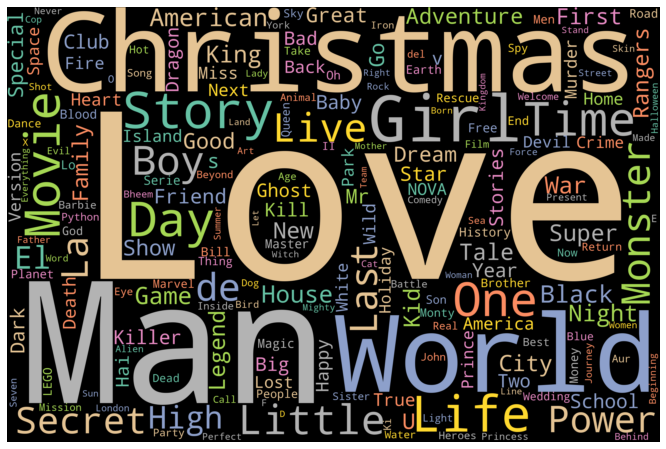

In [58]:

plt.subplots(figsize=(20,8))
#Creating the text variable
text = " ".join(title for title in df.title)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3000,height=2000,random_state=1,collocations = False, background_color = 'black',colormap='Set2').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most repeated words in title include Christmas, Love, World, Man, and Story.



##**Word Cloud of cast**

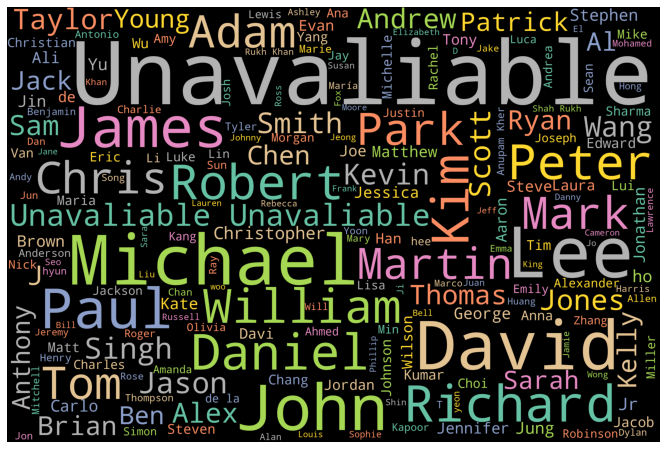

In [59]:
#Creating the text variable
text = " ".join(cast for cast in df.cast)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,8))
word_cloud = WordCloud(width=3000,height=2000, background_color = 'black',colormap='Set2').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


##**Word Cloud of Categories**

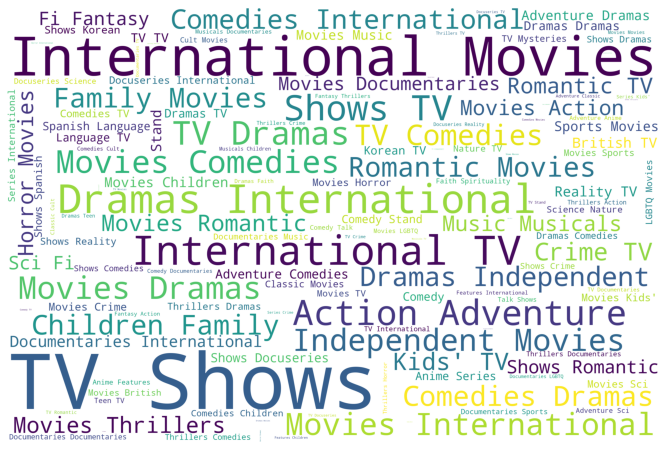

In [60]:
plt.subplots(figsize=(20,8))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3000,height=2000, background_color = 'white').generate(" ".join(i for i in df.listed_in))

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud of description**

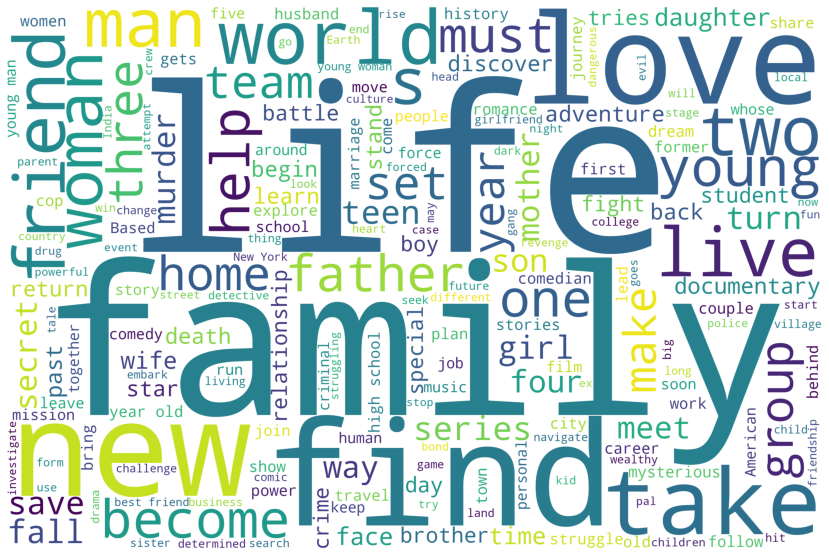

In [61]:
#Creating the text variable
text = " ".join(df.description)
#Create StopWOrd
stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,10))
word_cloud = WordCloud(width=3000,height=2000, background_color = 'white',stopwords=STOPWORDS).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**Creating a Target variable consist of description, rating, country, listed_in, cast and director to make clusters.**

In [62]:
#Creat 'target' variable to utilize model
netflix_df['target']=netflix_df['description']+' '+netflix_df['rating']+' '+netflix_df['country']+' '+netflix_df['listed_in']+' '+netflix_df['cast']+' '+netflix_df['director']

##**Lowercasing and removing punctuation**



Function to remove punctuation

In [63]:
# Remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

Applying remove punctuation

In [64]:
netflix_df['target'] = netflix_df['target'].apply(remove_punctuation)
netflix_df['target'].head(5).reset_index()

,index,target
0,0,In a future where the elite inhabit an island ...
1,1,After a devastating earthquake hits Mexico Cit...
2,2,When an army recruit is found dead his fellow ...
3,3,In a postapocalyptic world ragdoll robots hide...
4,4,A brilliant group of students become cardcount...


In [65]:
# importing nltk and stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
# extracting the stopwords from nltk library
Stop_Word = stopwords.words('english')
# displaying the stopwords
print(np.array(Stop_Word))
print("Number of stopwords: ", len(Stop_Word))

['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' "you're"
 "you've" "you'll" "you'd" 'your' 'yours' 'yourself' 'yourselves' 'he'
 'him' 'his' 'himself' 'she' "she's" 'her' 'hers' 'herself' 'it' "it's"
 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves' 'what' 'which'
 'who' 'whom' 'this' 'that' "that'll" 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 "don't" 'should' "should've" 'now' 'd' 'll' 'm' 'o' 're' 've' 'y'

##**Function to remove stopwords**





In [67]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in Stop_Word]
    # joining the list of words with space separator
    return " ".join(text)

In [68]:
# removing stop words from target
netflix_df['target'] = netflix_df['target'].apply(stopwords)
netflix_df['target'].head(5).reset_index()

,index,target
0,0,future elite inhabit island paradise far crowd...
1,1,devastating earthquake hits mexico city trappe...
2,2,army recruit found dead fellow soldiers forced...
3,3,postapocalyptic world ragdoll robots hide fear...
4,4,brilliant group students become cardcounting e...




##**Stemming operations** : to stem the words

A function to carry out stemming operation

In [69]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [70]:

#Applying steming functing on target columns
netflix_df['target'] = netflix_df['target'].apply(stemming)
netflix_df['target'].head(10)

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
5    genet professor experi treatment comatos siste...
6    aw accid coupl admit grisli hospit separ must ...
7    one high school student attack dedic teacher t...
8    doctor goe miss psychiatrist wife treat bizarr...
9    architect wife move castl slate becom luxuri h...
Name: target, dtype: object

Using Tfidfvectorizer for modeling 

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = netflix_df['target'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

**Silhouette score for different clusters**

In [72]:
Inertia=[]
K=range(2,20)

In [73]:
from sklearn.metrics import silhouette_samples, silhouette_score
Inertia=[]
for k in range(2,20):
  model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,random_state=4)
  print(f"for {k} clusters silhouette score is {silhouette_score(features,model.fit_predict(features))}") 
  Inertia.append(model.inertia_)


for 2 clusters sillhoutte score is 0.004185328126499934
for 3 clusters sillhoutte score is 0.00489511044083977
for 4 clusters sillhoutte score is 0.0055086785796094485
for 5 clusters sillhoutte score is 0.005748040917906634
for 6 clusters sillhoutte score is 0.005809583983068516
for 7 clusters sillhoutte score is 0.004588611484809266
for 8 clusters sillhoutte score is 0.005105341311998994
for 9 clusters sillhoutte score is 0.005216810999135943
for 10 clusters sillhoutte score is 0.005020749536950384
for 11 clusters sillhoutte score is 0.0054352141819225975
for 12 clusters sillhoutte score is 0.0058480116957081805
for 13 clusters sillhoutte score is 0.005132805588706665
for 14 clusters sillhoutte score is 0.005159659807756344
for 15 clusters sillhoutte score is 0.005607616542819385
for 16 clusters sillhoutte score is 0.0055454798113489185
for 17 clusters sillhoutte score is 0.005490424183092884
for 18 clusters sillhoutte score is 0.005390072704026183
for 19 clusters sillhoutte score is 

we get the optimal number of cluster is equal to 6

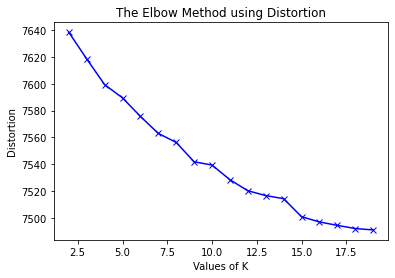

In [74]:
plt.plot(K,Inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Elbow curve

In [75]:
netflix_df['cluster'] = model.labels_

In [76]:
clusters = netflix_df.groupby('cluster')['target'].count()

In [77]:
clusters

cluster
0      216
1      573
2      327
3      218
4      756
5     1036
6      290
7      310
8      213
9      314
10     160
11     466
12     222
13     385
14     505
15     405
16     749
17     246
18     379
Name: target, dtype: int64

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

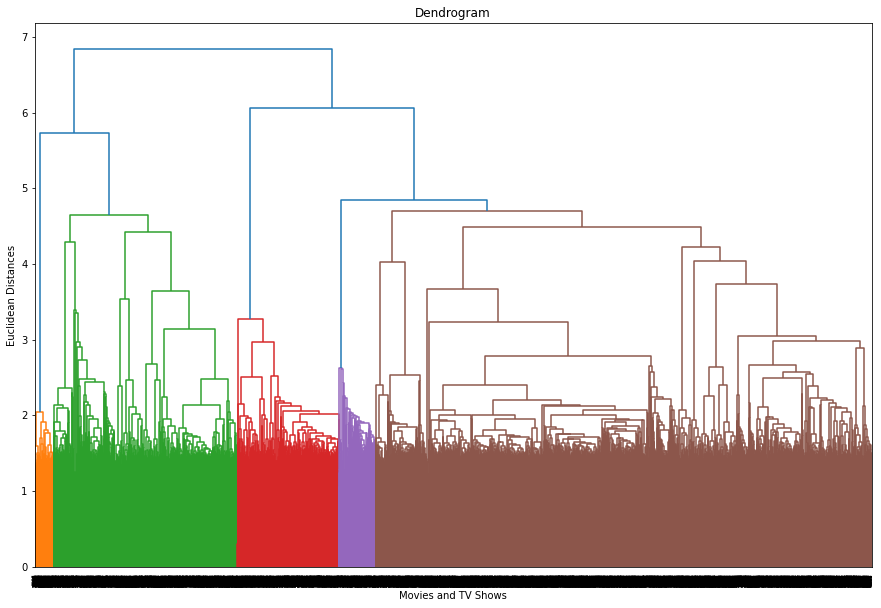

In [79]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(features.toarray(), method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Movies and TV Shows')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [80]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(features.toarray())

In [81]:
y_hc

array([0, 0, 0, ..., 0, 1, 0])

In [94]:
model =KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,random_state=4)
model.fit_predict(features)

array([ 5,  3, 15, ...,  4,  5,  4], dtype=int32)

In [95]:
netflix_df['cluster'] = model.labels_

In [96]:
clusters = netflix_df.groupby('cluster')

In [85]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target,cluster
0,s1,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...,2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...,5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...,1


In [97]:
for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['title','target']] # get title and description columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 state
 unit
 drama
 movi
 independ
 taylor
 harri
 tvma
 paul
 jr
------------
Cluster 1:
 unit
 michael
 state
 action
 john
 adventur
 jame
 drama
 pg13
 robert
------------
Cluster 2:
 docuseri
 unavali
 tv
 natur
 scienc
 unit
 crime
 seri
 british
 state
------------
Cluster 3:
 tv
 spanishlanguag
 spain
 mexico
 lui
 juan
 intern
 tvma
 maría
 carlo
------------
Cluster 4:
 documentari
 unit
 unavali
 music
 state
 movi
 tvpg
 tvma
 sport
 tv14
------------
Cluster 5:
 tv
 unavali
 intern
 realiti
 tvma
 drama
 crime
 kim
 tv14
 unit
------------
Cluster 6:
 state
 unit
 comedi
 adam
 peter
 drama
 movi
 paul
 chris
 pg13
------------
Cluster 7:
 movi
 comedi
 romant
 turkey
 state
 unit
 independ
 drama
 tvma
 intern
------------
Cluster 8:
 tv
 wang
 chen
 taiwan
 china
 intern
 romant
 unavali
 wu
 hong
------------
Cluster 9:
 japan
 anim
 egypt
 el
 ahm
 moham
 intern
 seri
 tv14
 tv
------------
Cluster 10:
 singh
 india
 movi
 kumar
 intern

In [ ]:
cluster_0=pd.read_csv('/content/cluster0.csv')

In [ ]:
cluster_0

In [98]:
cluster_6=pd.read_csv('/content/cluster6.csv')

In [99]:
cluster_6

,id,title,target
0,17,22-Jul,devast terror attack norway young survivor gri...
1,46,1 Chance 2 Dance,aspir dancer uproot senior year high school fi...
2,47,1 Mile to You,escap bus accid kill girlfriend high school st...
3,64,13 Reasons Why: Beyond the Reasons,cast member writer produc mental health profes...
4,72,17 Again,near midlif crisi thirtysometh mike wish doove...
...,...,...,...
285,7678,WWII in HD,rare color footag interwoven firsthand intervi...
286,7685,XOXO,live bud dj loyal pal hopeless romant jade has...
287,7714,Yoga Hosers,allimport high school parti stake two teen yog...
288,7736,Young Adult,divorc writer get letter old boyfriend announc...


#Test K-Means Clustering Model

I will test the k-means clustering model using one of my favourite movie, Blood Money.

In [106]:
# Get cluster number from given movie or TV show
cluster_num = netflix_df[netflix_df.title=='Blood Money'].cluster.item()

# View cluster the movie or TV show belongs to
netflix_df[netflix_df.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target,cluster
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",doctor goe miss psychiatrist wife treat bizarr...,14
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,architect wife move castl slate becom luxuri h...,14
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",india independ day zani mishap mumbai chawl di...,14
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,accident connect internet two stranger form ti...,14
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",taxi driver gangster athlet struggl better liv...,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,s7698,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,thank arrang marriag design make ail grandmoth...,14
7701,s7702,Movie,Yeh Ballet,Sooni Taraporevala,"Julian Sands, Manish Chauhan, Achintya Bose, J...",India,"February 21, 2020",2020,TV-MA,117 min,"Dramas, International Movies","Discovered by an eccentric ballet master, two ...",discov eccentr ballet master two gift underpri...,14
7702,s7703,Movie,Yeh Hai Bakrapur,Unavaliable,"Amit Sial, Yoshika Verma, Anshuman Jha, Asif B...",India,"November 1, 2018",2014,TV-PG,95 min,"Comedies, Dramas, Independent Movies",A poor family’s goat suddenly acquires divine ...,poor famili goat sudden acquir divin status sp...,14
7763,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,chang leadership polit parti spark bitter conf...,14


**Implementing LDA to see how words grouped topic wise**

In [107]:
from sklearn.decomposition import LatentDirichletAllocation

In [108]:
documents = netflix_df['target'].values.astype("U")

In [109]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {}

# LDA model
lda = LatentDirichletAllocation(n_components=7)
lda.fit(features)

LatentDirichletAllocation(n_components=7)

In [110]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 18.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e7cbdb8c4ce57db7e840337e93cf0e74303142217ee0ff3436d7e92be26ea1a5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=998066548f296b5b4ba0ef94bd325de680b6396c05fcf3c0b00dc1c651507c50
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [111]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [112]:
lda_panel = pyLDAvis.sklearn.prepare(lda,features,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -29.594002  60.112713       1        1  44.903505
5     -45.996586  11.891685       2        1  12.193691
2      20.368856  70.019325       3        1  11.752900
6      53.928768  31.704309       4        1  10.429107
1     -12.437127 -26.423267       5        1   9.021606
4       3.965971  21.797720       6        1   6.824049
3      37.524284 -16.517805       7        1   4.875142, topic_info=           Term        Freq       Total Category  logprob  loglift
38899        tv  166.000000  166.000000  Default  30.0000  30.0000
17674    intern   88.000000   88.000000  Default  29.0000  29.0000
11100     egypt    7.000000    7.000000  Default  28.0000  28.0000
39130   unavali  126.000000  126.000000  Default  27.0000  27.0000
25567      movi  123.000000  123.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
23166       man    0.355971   27.395640   Topic7  -8.6716  -1.3223
31845    romant    0.341476   43.007758   Topic7  -8.7131  -1.8148
37942  thriller    0.330355   32.318236   Topic7  -8.7462  -1.5622
20136    killer    0.307440    8.123946   Topic7  -8.8181  -0.2533
38907      tvpg    0.304214   44.785871   Topic7  -8.8287  -1.9709

[547 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
412        2  0.684034     abdel
604        1  0.676058    action
604        2  0.093249    action
604        3  0.093249    action
604        4  0.069937    action
...      ...       ...       ...
41823      2  0.478145   youssef
41823      5  0.239072   youssef
41878      1  0.615952      yuki
41878      2  0.205317      yuki
42198      4  0.950354  zhenhuan

[675 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 7, 2, 5, 4])

argsort gives
Index of lowest to highest **element**
helpful in finding most repeated words

* Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering on data we got the best cluster arrangements.By applying different clustering algorithms to our dataset.
* The final model we used was k-means clustering, which consisted of 5,6,12 & 15 clusters. 6 numbers of clusters give us good fitting.